# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key as api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [10]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={api_key}&q={city}&units=Imperial'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response= requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
#       done above
        city_weather = response 
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather["dt"]

#         Append the City information into city_data list
        city_data.append({"City": city, 
                            "Lat": city_lat, 
                            "Lng": city_lng, 
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | viedma
Processing Record 2 of Set 1 | weno
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | luchenza
Processing Record 5 of Set 1 | portland
Processing Record 6 of Set 1 | ust-nera
Processing Record 7 of Set 1 | daru
Processing Record 8 of Set 1 | qaqortoq
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | thanh pho uong bi
Processing Record 13 of Set 1 | geraldton
Processing Record 14 of Set 1 | gadzhiyevo
Processing Record 15 of Set 1 | mount pearl
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | savelugu
Processing Record 18 of Set 1 | conceicao do araguaia
Processing Record 19 of Set 1 | ilulissat
Processing Record 20 of Set 1 | tiksi
Processing Record 21 of Set 1 | isafjordur
Processing Record 22 of Set 1 | puerto natales
Processing

Processing Record 38 of Set 4 | ambajogai
Processing Record 39 of Set 4 | port-gentil
Processing Record 40 of Set 4 | queenstown
Processing Record 41 of Set 4 | tazovsky
Processing Record 42 of Set 4 | santa maria de cayon
Processing Record 43 of Set 4 | muravlenko
Processing Record 44 of Set 4 | tortoli
Processing Record 45 of Set 4 | inirida
Processing Record 46 of Set 4 | arraial do cabo
Processing Record 47 of Set 4 | eaglehawk
Processing Record 48 of Set 4 | remire-montjoly
Processing Record 49 of Set 4 | el bolson
Processing Record 0 of Set 5 | pitimbu
Processing Record 1 of Set 5 | kotli
Processing Record 2 of Set 5 | alexandria
Processing Record 3 of Set 5 | sitka
Processing Record 4 of Set 5 | puerto lempira
Processing Record 5 of Set 5 | dadukou
Processing Record 6 of Set 5 | lompoc
Processing Record 7 of Set 5 | as sulayyil
Processing Record 8 of Set 5 | whistler
Processing Record 9 of Set 5 | vadso
Processing Record 10 of Set 5 | port shepstone
Processing Record 11 of Set 5

Processing Record 35 of Set 8 | san francisco
Processing Record 36 of Set 8 | motueka
Processing Record 37 of Set 8 | dengzhou
Processing Record 38 of Set 8 | zhalantun
Processing Record 39 of Set 8 | we
City not found. Skipping...
Processing Record 40 of Set 8 | takamaka
City not found. Skipping...
Processing Record 41 of Set 8 | chom bueng
Processing Record 42 of Set 8 | nuku'alofa
Processing Record 43 of Set 8 | cefalu
Processing Record 44 of Set 8 | taunggyi
Processing Record 45 of Set 8 | saint-philippe
Processing Record 46 of Set 8 | lorengau
Processing Record 47 of Set 8 | perbaungan
Processing Record 48 of Set 8 | sake
Processing Record 49 of Set 8 | rio grande
Processing Record 0 of Set 9 | sonsorol village
City not found. Skipping...
Processing Record 1 of Set 9 | quellon
Processing Record 2 of Set 9 | fort mcmurray
Processing Record 3 of Set 9 | kayangel
Processing Record 4 of Set 9 | puerto deseado
Processing Record 5 of Set 9 | igarka
Processing Record 6 of Set 9 | mandalg

Processing Record 21 of Set 12 | zeribet el oued
Processing Record 22 of Set 12 | chyorny yar
Processing Record 23 of Set 12 | smidovich
Processing Record 24 of Set 12 | malvan
Processing Record 25 of Set 12 | shemgang
Processing Record 26 of Set 12 | ilek
Processing Record 27 of Set 12 | vredendal
Processing Record 28 of Set 12 | mongoumba
Processing Record 29 of Set 12 | karachi
Processing Record 30 of Set 12 | panaba
Processing Record 31 of Set 12 | imbituba
Processing Record 32 of Set 12 | broken hill
Processing Record 33 of Set 12 | yeniseysk
Processing Record 34 of Set 12 | mangrol
Processing Record 35 of Set 12 | nova vicosa
Processing Record 36 of Set 12 | gisborne
Processing Record 37 of Set 12 | kokpekty
Processing Record 38 of Set 12 | aldinga beach
Processing Record 39 of Set 12 | klyuchi
Processing Record 40 of Set 12 | zambezi
Processing Record 41 of Set 12 | bubaque
Processing Record 42 of Set 12 | malanje
Processing Record 43 of Set 12 | tazacorte
Processing Record 44 o

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,viedma,-40.8135,-62.9967,46.35,81,62,13.53,AR,1690336778
1,weno,7.4515,151.8468,82.42,75,89,5.57,FM,1690336779
2,kodiak,57.7900,-152.4072,62.11,72,0,11.50,US,1690336779
3,luchenza,-16.0069,35.3095,54.14,96,17,3.33,MW,1690336779
4,portland,45.5234,-122.6762,79.56,45,0,9.22,US,1690336651


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,46.35,81,62,13.53,AR,1690336778
1,weno,7.4515,151.8468,82.42,75,89,5.57,FM,1690336779
2,kodiak,57.7900,-152.4072,62.11,72,0,11.50,US,1690336779
3,luchenza,-16.0069,35.3095,54.14,96,17,3.33,MW,1690336779
4,portland,45.5234,-122.6762,79.56,45,0,9.22,US,1690336651


### Create the Scatter Plots Requested


In [22]:
# create variables needed
latitude = city_data_df['Lat']
temperature = city_data_df['Max Temp']
Humidity = city_data_df['Humidity']
Cloudiness = city_data_df['Humidity']
Wind_Speed = city_data_df['Wind Speed']

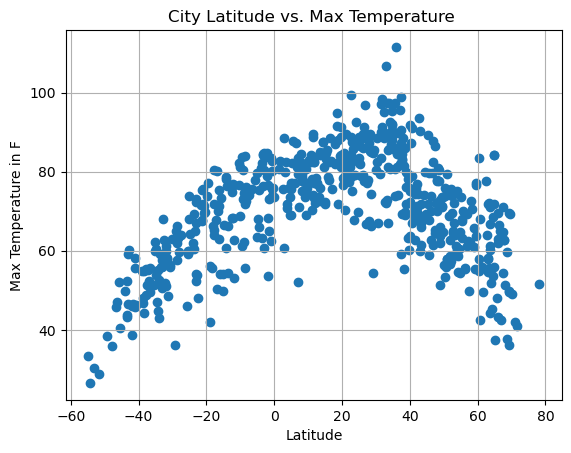

In [23]:
#### Latitude Vs. Temperature -->
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE

plt.scatter(latitude, temperature,)

# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Max Temperature ")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in F')
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

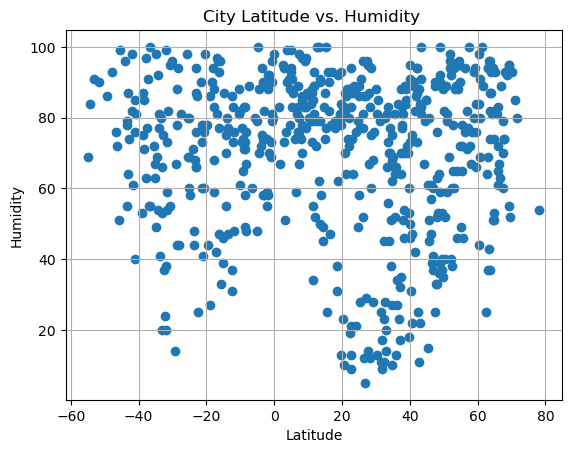

In [24]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(latitude, Humidity)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Humidity ")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

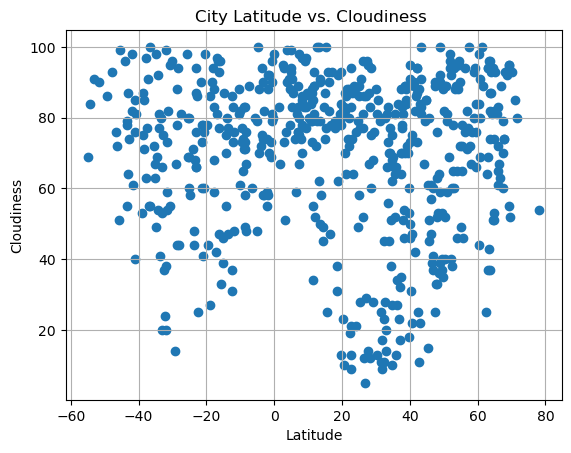

In [25]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(latitude, Cloudiness,)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Cloudiness ")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

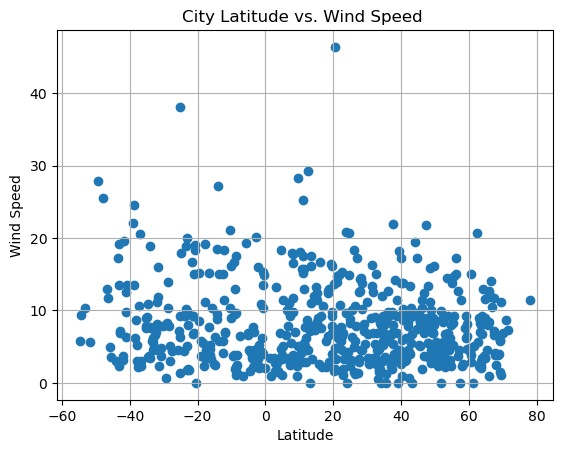

In [26]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(latitude, Wind_Speed,)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.title(f"City Latitude vs. Wind Speed ")
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

The r-squared is: 0.05020916140712664


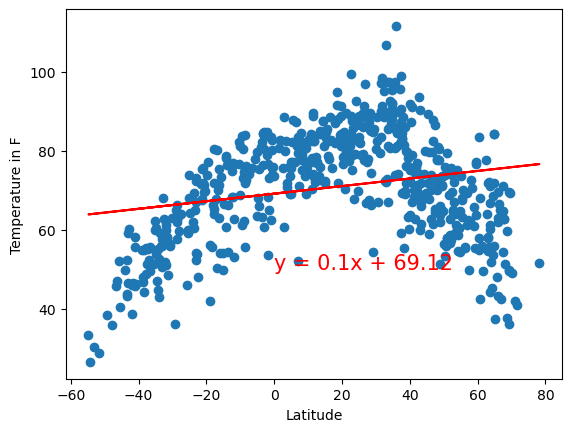

In [44]:
# Latitude Vs. Temperature
x_values = latitude
y_values = temperature
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature in F')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0022332451767135895


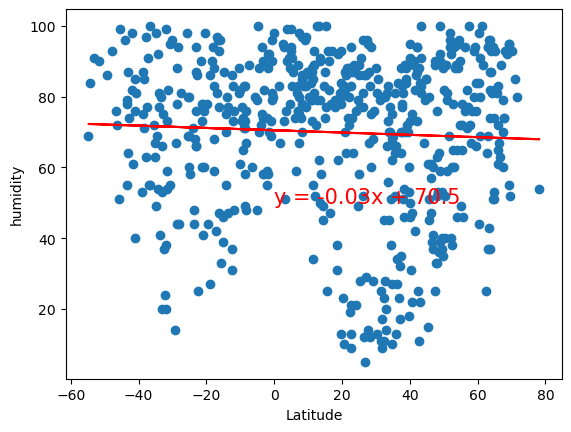

In [43]:
# Latitude Vs. Humiditiy
x_values = latitude
y_values = Humidity
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.0022332451767135895


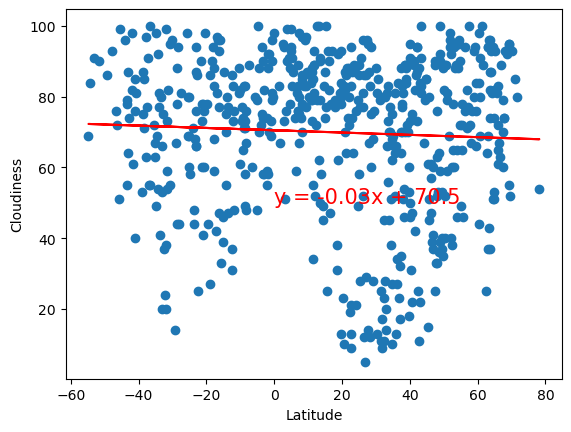

In [46]:
# Latitude Vs. Cloudines
x_values = latitude
y_values = Cloudiness
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.018629803568566024


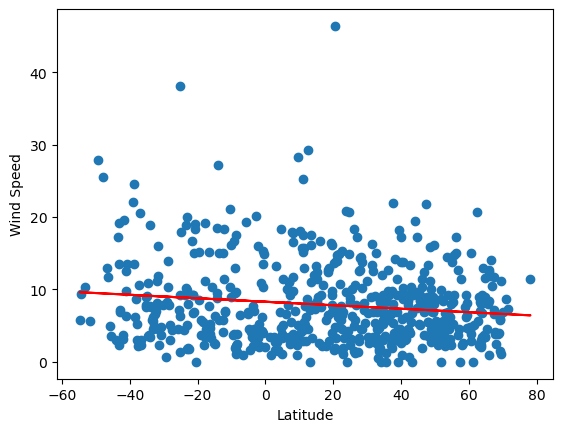

In [47]:
# Latitude Vs. Cloudines
x_values = latitude
y_values = Wind_Speed
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

In [36]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>= 0,:]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,weno,7.4515,151.8468,82.42,75,89,5.57,FM,1690336779
2,kodiak,57.7900,-152.4072,62.11,72,0,11.50,US,1690336779
4,portland,45.5234,-122.6762,79.56,45,0,9.22,US,1690336651
5,ust-nera,64.5667,143.2000,68.56,51,54,3.44,RU,1690336779
7,qaqortoq,60.7167,-46.0333,42.58,91,87,2.89,GL,1690336779


In [37]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<= 0,:]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,viedma,-40.8135,-62.9967,46.35,81,62,13.53,AR,1690336778
3,luchenza,-16.0069,35.3095,54.14,96,17,3.33,MW,1690336779
6,daru,-9.0763,143.2092,80.44,65,100,12.91,PG,1690336779
8,grytviken,-54.2811,-36.5092,26.58,84,76,9.31,GS,1690336780
9,port-aux-francais,-49.3500,70.2167,38.48,86,100,27.83,TF,1690336780


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.3423893227932875


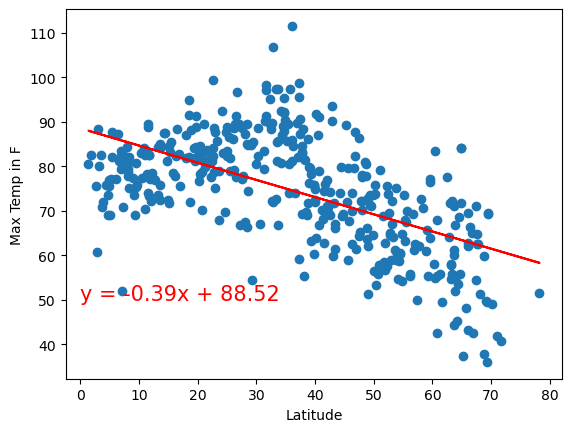

In [48]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in F')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.6206762195614096


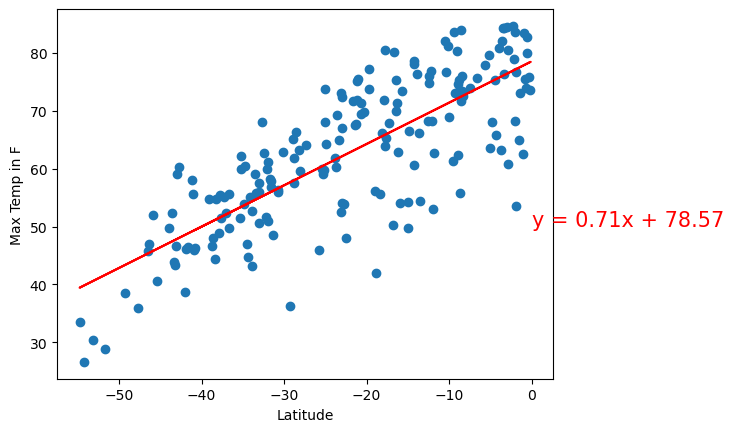

In [49]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp in F')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
The splitting of the data into Northern and Southern Hemisphers has helped the data be more correlated, ie higher r scores.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.0010838727746958847


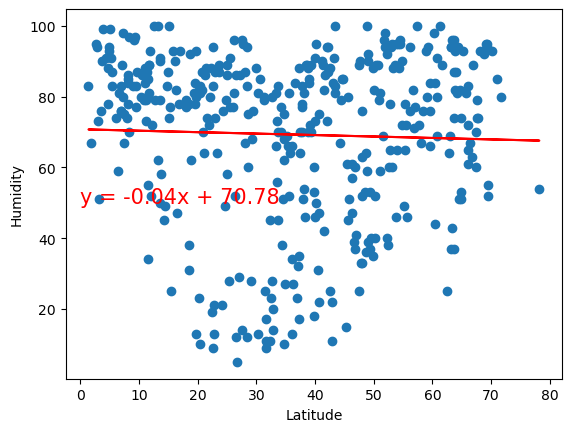

In [50]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.00017732533430649906


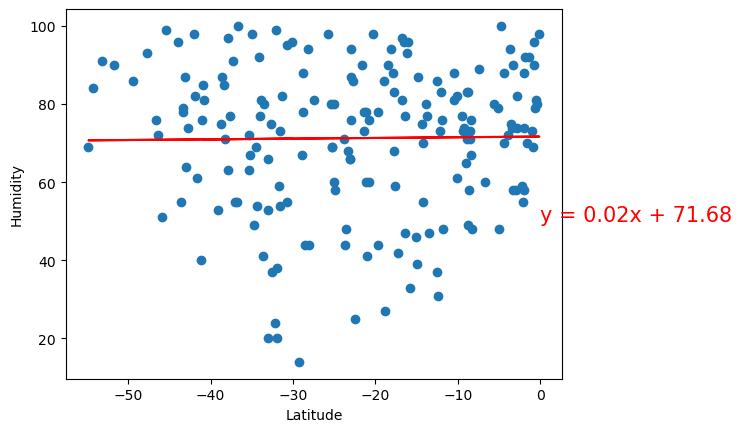

In [53]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is no strong relationship between Latitude and humidity.  Even when splitting the data between Northern and Southern Hemispheres the data is shows little, if any, corelation.  The points are very sparatically spread.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.00742104383193829


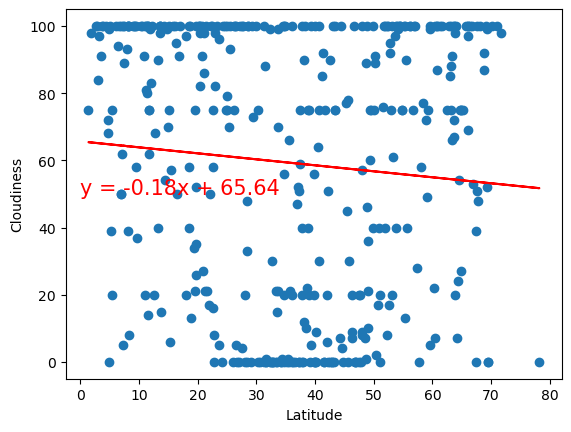

In [51]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.052467622885485385


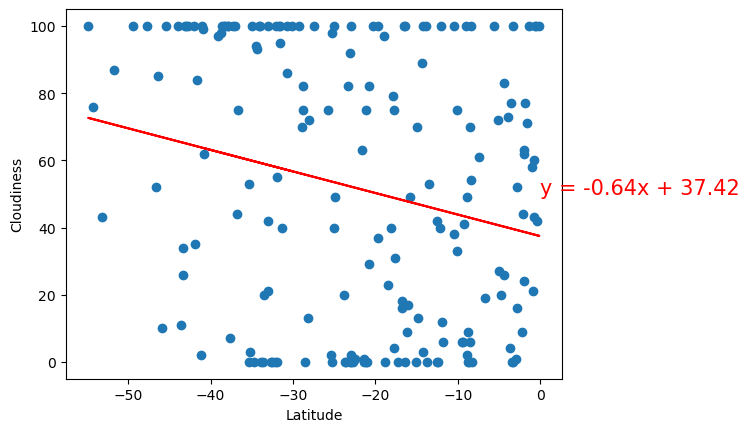

In [54]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is no strong relationship between Latitude and cloudiness.  Even when splitting the data between Northern and Southern Hemispheres the data is shows little, if any, corelation.  The points are very sparatically spread.  I find it interesting how many citties fall at the extremes in this data set.  

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.013583215137179545


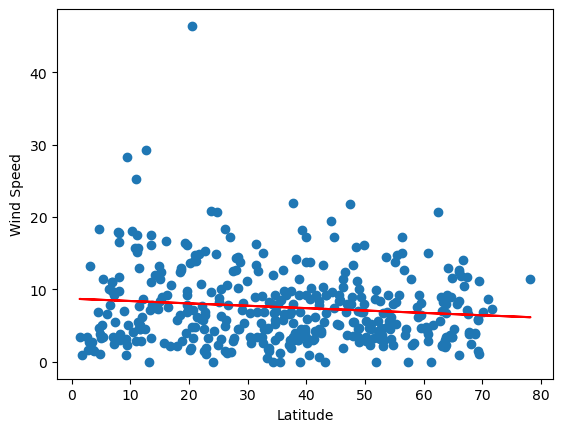

In [52]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.01860194593005733


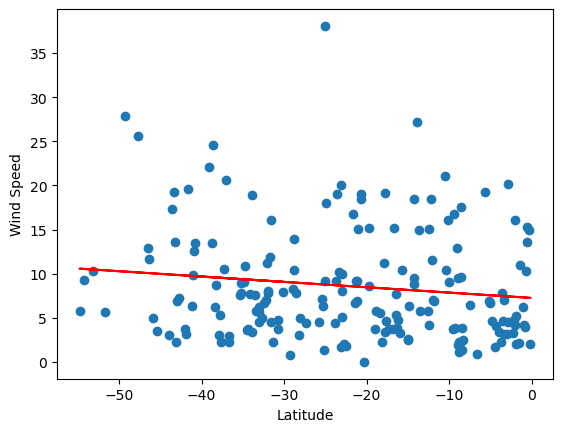

In [55]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE
There is no strong relationship between Latitude and wind speed.  Even when splitting the data between Northern and Southern Hemispheres the data is shows little, if any, corelation.  The points are very sparatically spread.  